In [221]:
# This program creates a boxplot from data stored in a csv file and saves it as a png image.

# The data file must be one column of numbers - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file sample_boxplot_data.csv for reference.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
df = pd.read_csv('coursework_1_data_2019.csv', low_memory = False)
# In the next line, replace sample_boxplot_data.csv with the filename of your data:
df.info()

# In the next line, replace boxplot with the filename you wish to save as:


# Use the next line to set figure height and width (experiment to check the scale):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [222]:
#create new variable: Casechange_2013, Casechange_2018 and the per person budget in six areas in 2008 and 2013

df['Casechange_2013'] = ((df['2013_cases_total']/df['2013_pop_total']) - (df['2008_cases_total']/df['2008_pop_total']))/(df['2008_cases_total']/df['2008_pop_total'])
df['Casechange_2013']   
df['Casechange_2018'] = ((df['2018_cases_total']/df['2018_pop_total']) - (df['2013_cases_total']/df['2013_pop_total']))/(df['2013_cases_total']/df['2013_pop_total'])
df['per_clean_air_2008'] = df['clean_air']/df['2008_pop_total']
df['per_clean_environ_2008'] = df['clean_environ']/df['2008_pop_total']
df['per_health_training_2008'] = df['health_training']/df['2008_pop_total']
df['per_school_awareness_2008'] = df['school_awareness']/df['2008_pop_total']
df['per_media_awareness_2008'] = df['media_awareness']/df['2008_pop_total']
df['per_sub_counselling_2008'] = df['sub_counselling']/df['2008_pop_total']
df['per_clean_air_2013'] = df['clean_air']/df['2013_pop_total']
df['per_clean_environ_2013'] = df['clean_environ']/df['2013_pop_total']
df['per_health_training_2013'] = df['health_training']/df['2013_pop_total']
df['per_school_awareness_2013'] = df['school_awareness']/df['2013_pop_total']
df['per_media_awareness_2013'] = df['media_awareness']/df['2013_pop_total']
df['per_sub_counselling_2013'] = df['sub_counselling']/df['2013_pop_total']

In [223]:
#describe new variables and compare them
df['Casechange_2013'].describe()

count    152.000000
mean       0.043413
std        0.088698
min       -0.815514
25%        0.011961
50%        0.039593
75%        0.076445
max        0.278623
Name: Casechange_2013, dtype: float64

In [224]:
df['Casechange_2018'].describe()

count    152.000000
mean       0.103903
std        0.244896
min       -0.217322
25%        0.029613
50%        0.070794
75%        0.122929
max        2.909836
Name: Casechange_2018, dtype: float64

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt

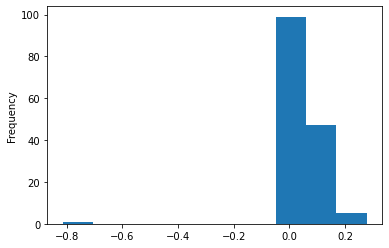

In [226]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange_2013'].plot.hist() # histogram
plt.savefig('histagram_2013.png')

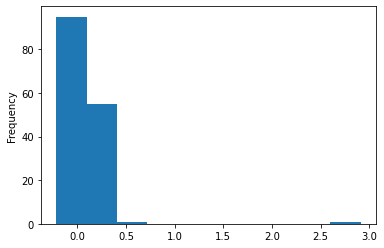

In [227]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange_2018'].plot.hist() # histogram
plt.savefig('histagram_2018.png')

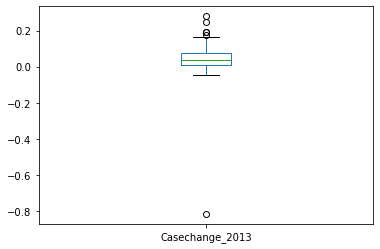

In [228]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange_2013'].plot.box() # boxplot
plt.savefig('box_plot_2013.png')

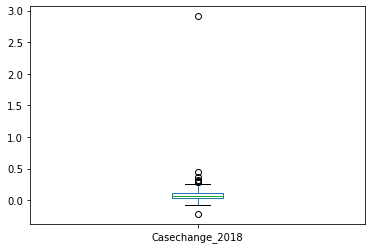

In [229]:
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
df['Casechange_2018'].plot.box() # boxplot
plt.savefig('box_plot_2018.png')

In [230]:
df['total_budget'].describe() # boxplot

count    1.520000e+02
mean     2.703092e+05
std      2.104618e+05
min      2.000000e+03
25%      1.400000e+05
50%      2.000000e+05
75%      3.017500e+05
max      1.170000e+06
Name: total_budget, dtype: float64

In [231]:
#delete the outlier 'Isles of Scilly'
df.drop([59],inplace = True)

In [232]:
# t-Test for two related samples
from scipy.stats import ttest_rel
print(ttest_rel(df['Casechange_2013'],df['Casechange_2018']))

Ttest_relResult(statistic=-4.67154060609338, pvalue=6.593613093028499e-06)


In [233]:
#create dummies
dummies = pd.get_dummies(df['local_authority_type'],prefix = None,prefix_sep = "_",dummy_na = False,columns = None,drop_first =False)
dummies

,london_borough,metropolitan_borough,non_metropolitan_county,other_london,unitary_authority
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
147,0,1,0,0,0
148,0,0,0,0,1
149,0,1,0,0,0
150,0,0,1,0,0


In [234]:
#choose london_borough, metropolitan_borough and non_metropolitan_country as dummy variables 
#and combine them with original dataframe
df['london_borough'] = dummies['london_borough']
df['metropolitan_borough'] = dummies['metropolitan_borough']
df['non_metropolitan_county'] = dummies['non_metropolitan_county']

In [235]:
df1 = df[['per_clean_air_2008','per_clean_environ_2008','per_health_training_2008','per_school_awareness_2008','per_media_awareness_2008','per_sub_counselling_2008','london_borough','metropolitan_borough','non_metropolitan_county']]

In [236]:
# There are so many independent variables and we should check if there is multicollinearity 
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [272]:
df_predictors_selected_VIF = drop_column_using_vif_(df1, thresh=5)
df_predictors_selected_VIF
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['per_clean_air_2008', 'per_clean_environ_2008',
       'per_health_training_2008', 'per_school_awareness_2008',
       'per_media_awareness_2008', 'per_sub_counselling_2008',
       'london_borough', 'metropolitan_borough', 'non_metropolitan_county'],
      dtype='object')


In [238]:
#the result above shows there is no multicollinearity, so we will put all these variables into function
#model1 Casechange_i2013 = 
model1 = sms.OLS(endog=df['Casechange_2013'], exog=sms.add_constant(df_predictors_selected_VIF)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Casechange_2013   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     5.944
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           4.99e-07
Time:                        14:54:11   Log-Likelihood:                 249.91
No. Observations:                 151   AIC:                            -479.8
Df Residuals:                     141   BIC:                            -449.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0176      0.018      0.955      0.341      -0.019       0.054
per_clean_air_2008            0.0824      0.049      1.669      0.097      -0.015       0.180
per_clean_environ_2008       -0.0030      0.047     -0.065      0.948      -0.096       0.090
per_health_training_2008      0.0433      0.108      0.400      0.690      -0.171       0.257
per_school_awareness_2008    -0.0854      0.040     -2.148      0.033      -0.164      -0.007
per_media_awareness_2008      0.1485      0.092      1.617      0.108      -0.033       0.330
per_sub_counselling_2008      0.0293      0.154      0.191      0.849      -0.274       0.333
london_borough                0.0611      0.011      5.703      0.000       0.040       0.082
metropolitan_borough          0.0222      0.010      2.137      0.034       0.002       0.043
non_metropolitan_county      -0.0216      0.011     -1.907      0.059      -0.044       0.001
==============================================================================
Omnibus:                       30.525   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.629
Skew:                           0.992   Prob(JB):                     1.01e-11
Kurtosis:                       5.027   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

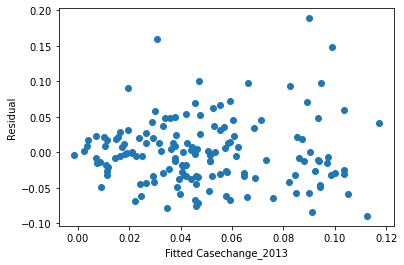

In [281]:
# residual analysis
%matplotlib inline
plt.figure(figsize=(6,4))
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted Casechange_2013')
plt.ylabel('Residual')
plt.savefig('Residual_analysis_2015.png')

In [ ]:
a = pd.Series(model1.fittedvalues, name = "fittedvalues") 
b = pd.Series(model1.resid,name = "resid")
df4 = pd.merge(a, b, right_index = True, 
               left_index = True) 
print(df4)

In [282]:
#stepwise regression
#model1 Casechange_i2013 = 
model1_stepwise = sms.OLS(endog=df['Casechange_2013'], exog=sms.add_constant(df[['london_borough','metropolitan_borough']])).fit()
model1_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Casechange_2013   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     21.20
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           7.99e-09
Time:                        16:23:36   Log-Likelihood:                 244.64
No. Observations:                 151   AIC:                            -483.3
Df Residuals:                     148   BIC:                            -474.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0289      0.005      5.453      0.000       0.018       0.039
london_borough           0.0648      0.010      6.441      0.000       0.045       0.085
metropolitan_borough     0.0269      0.010      2.790      0.006       0.008       0.046
==============================================================================
Omnibus:                       28.337   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.279
Skew:                           0.985   Prob(JB):                     6.60e-10
Kurtosis:                       4.686   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
df2 = df[['per_clean_air_2013','per_clean_environ_2013','per_health_training_2013','per_school_awareness_2013','per_media_awareness_2013','per_sub_counselling_2013','london_borough','metropolitan_borough','non_metropolitan_county']]

In [284]:
#collinearity diagnostics
df_predictors_selected_VIF = drop_column_using_vif_(df2, thresh=5)
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['per_clean_air_2013', 'per_clean_environ_2013',
       'per_health_training_2013', 'per_school_awareness_2013',
       'per_media_awareness_2013', 'per_sub_counselling_2013',
       'london_borough', 'metropolitan_borough', 'non_metropolitan_county'],
      dtype='object')


In [285]:
# we will put all these variables into function
#model2 Casechange_i2013 = 
model2 = sms.OLS(endog=df['Casechange_2018'], exog=sms.add_constant(df_predictors_selected_VIF)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Casechange_2018   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           5.12e-13
Time:                        16:24:29   Log-Likelihood:                 195.80
No. Observations:                 151   AIC:                            -371.6
Df Residuals:                     141   BIC:                            -341.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0247      0.024      1.021      0.309      -0.023       0.073
per_clean_air_2013           -0.0311      0.072     -0.431      0.667      -0.174       0.112
per_clean_environ_2013        0.0787      0.067      1.169      0.244      -0.054       0.212
per_health_training_2013      0.0839      0.160      0.525      0.600      -0.232       0.400
per_school_awareness_2013    -0.0843      0.057     -1.475      0.142      -0.197       0.029
per_media_awareness_2013      0.2513      0.135      1.858      0.065      -0.016       0.519
per_sub_counselling_2013     -0.0064      0.221     -0.029      0.977      -0.444       0.431
london_borough                0.1365      0.015      8.919      0.000       0.106       0.167
metropolitan_borough          0.0329      0.015      2.209      0.029       0.003       0.062
non_metropolitan_county      -0.0002      0.016     -0.012      0.991      -0.032       0.032
==============================================================================
Omnibus:                        8.728   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               17.860
Skew:                           0.064   Prob(JB):                     0.000132
Kurtosis:                       4.680   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

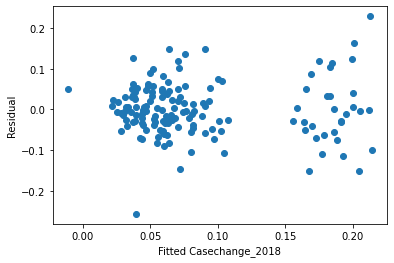

In [286]:
# residual analysis
figure_width, figure_height = 6,4
plt.figure(figsize=(figure_width,figure_height))
plt.scatter(model2.fittedvalues, model2.resid)
plt.xlabel('Fitted Casechange_2018')
plt.ylabel('Residual')
plt.savefig('Residual_analysis3')

In [287]:
#stepwise regression
#model2 Casechange_i2013 = 
model2_stepwise = sms.OLS(endog=df['Casechange_2018'], exog=sms.add_constant(df[['london_borough','metropolitan_borough']])).fit()
model2_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Casechange_2018   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     46.46
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           2.19e-16
Time:                        16:26:59   Log-Likelihood:                 192.06
No. Observations:                 151   AIC:                            -378.1
Df Residuals:                     148   BIC:                            -369.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0480      0.008      6.380      0.000       0.033       0.063
london_borough           0.1374      0.014      9.635      0.000       0.109       0.166
metropolitan_borough     0.0346      0.014      2.528      0.013       0.008       0.062
==============================================================================
Omnibus:                       12.630   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.840
Skew:                           0.213   Prob(JB):                     2.01e-07
Kurtosis:                       5.173   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""